In [70]:
#한글 깨짐 방지 코드
from matplotlib import rc, style, font_manager
font_name = font_manager.FontProperties(fname="C:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
style.use('ggplot')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
import pandas as pd
df1 = pd.read_csv("C:/Users/user/치안안전데이터분석공모전/최종전처리.csv", encoding='euc-kr')
df2 = pd.read_excel("D:/치안빅데이터/데이터\대전15-19세.xlsx")

df1.drop(columns='Unnamed: 0', axis=1, inplace=True)
df2['행정동'] = df2['행정동'].str.split().str[2] # 띄어쓰기 제거

In [9]:
print('df1')
print(df1['행정동'].unique())
print(len(df1['행정동'].unique()))
print('-'*100)
print('df2')
print(df2['행정동'].unique())
print(len(df2['행정동']))

df1
['대동' '산내동' '둔산1동' '법1동' '가수원동' '탄방동' '용문동' '문창동' '온천2동' '진잠동' '중리동' '중촌동'
 '구즉동' '전민동' '대화동' '관평동' '유천1동' '오정동' '대청동' '대흥동' '산성동' '은행선화동' '노은2동'
 '노은3동' '온천1동' '신성동' '둔산2동' '둔산3동' '도마1동' '태평1동' '용전동' '부사동' '만년동' '효동'
 '신인동' '덕암동' '오류동' '변동' '법2동' '월평1동' '문화1동' '석교동' '괴정동' '중앙동' '용운동' '판암2동'
 '가양1동' '노은1동' '원신흥동' '내동' '월평2동' '가양2동' '도마2동' '송촌동' '갈마2동' '상대동' '갈마1동'
 '삼성동' '용두동' '관저2동' '태평2동' '관저1동' '복수동' '성남동' '석봉동' '문화2동' '신탄진동' '대사동'
 '회덕동' '자양동' '비래동' '목상동' '목동' '정림동' '월평3동' '학하동' '홍도동' '유천2동' '기성동' '가장동'
 '판암1동']
81
----------------------------------------------------------------------------------------------------
df2
['중앙동' '효동' '신인동' '판암1동' '판암2동' '용운동' '대동' '자양동' '가양1동' '가양2동' '용전동' '성남동'
 '홍도동' '삼성동' '대청동' '산내동' '은행선화동' '목동' '중촌동' '대흥동' '문창동' '석교동' '대사동' '부사동'
 '용두동' '오류동' '태평1동' '태평2동' '유천1동' '유천2동' '문화1동' '문화2동' '산성동' '복수동' '도마1동'
 '도마2동' '정림동' '변동' '용문동' '탄방동' '괴정동' '가장동' '내동' '갈마1동' '갈마2동' '월평1동'
 '월평2동' '월평3동' '가수원동' '도안동' '관저1동' '관저2동' '기성동' '둔산1동' '둔산2동' '만년동' '둔산3동'

In [73]:
df3 = pd.merge(df1,df2, how='inner',on='행정동')
df3['성인인구'] = df3['총인구수'] - df3['노인인구'] - df3['15~19세'] - df3['유소년인구']
df3.drop(columns=['15~19세'],axis=1,inplace=True)

In [109]:
df3[df3['사건종별'] == 406]

,사건종별,발생지점,발생좌표x,발생좌표y,접수완료날짜,접수완료시간대,접수연도,접수월,접수일자,접수완료시간,...,강수량,적설,총인구수,요일,노인인구,유소년인구,계절,인구밀도,성인인구,주야간구분
5,406,대전광역시 동구 대동(행정:대동) 149-1,127.442942,36.329259,2020-12-10,18:07:07,20,12,10,18,...,0,0,14225,목요일,2636,1913,겨울,19222.972973,9000,야간
9,406,대전광역시 동구 대동(행정:대동) 196-4,127.445843,36.326063,2020-12-19,17:03:27,20,12,19,17,...,0,0,14225,토요일,2636,1913,겨울,19222.972973,9000,주간
33,406,대전광역시 동구 대동(행정:대동) 401-1,127.445210,36.333941,2021-02-02,21:05:31,21,2,2,21,...,0,0,14225,화요일,2636,1913,겨울,19222.972973,9000,야간
35,406,대전광역시 동구 대동(행정:대동),127.444620,36.326581,2021-02-03,22:06:59,21,2,3,22,...,0,0,14225,수요일,2636,1913,겨울,19222.972973,9000,야간
37,406,대전광역시 동구 대동(행정:대동) 149-1,127.442942,36.329259,2021-02-03,5:21:10,21,2,3,5,...,0,1,14225,수요일,2636,1913,겨울,19222.972973,9000,심야
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101424,406,대전광역시 동구 판암동 (행정:판암1동) 0,127.465757,36.318554,2021-11-29,22:54:32,21,11,29,22,...,0,0,12093,월요일,2936,1089,가을,2334.555985,7608,야간
101436,406,대전광역시 동구 판암동 (행정:판암1동 ) 708-3,127.448925,36.319609,2022-03-18,21:11:36,22,3,18,21,...,1,0,12093,금요일,2936,1089,봄,2334.555985,7608,야간
101449,406,대전광역시 동구 판암동 (행정:판암1동 ) 385-21,127.458202,36.315089,2022-08-17,7:18:29,22,8,17,7,...,0,0,12093,수요일,2936,1089,여름,2334.555985,7608,심야
101457,406,대전광역시 동구 판암동 (행정:판암1동 ) 312,127.458259,36.316898,2022-09-17,5:38:46,22,9,17,5,...,0,0,12093,토요일,2936,1089,가을,2334.555985,7608,심야


In [74]:
def convert_to_time_of_day(hour):
    if hour in [0,1,2,3,4,5,6,7]:
        return '심야'
    elif hour in [8,9,10,11,12,13,14,15,16,17]:
        return '주간'
    else:
        return '야간'

df3['주야간구분'] = df3['접수완료시간'].apply(convert_to_time_of_day)

df3['강수량'] = df3['강수량'].apply(lambda x: 0 if pd.isnull(x) else 1)
df3['적설'] = df3['적설'].apply(lambda x: 0 if pd.isnull(x) else 1)

df_count = df3.groupby(['사건종별','시군구','행정동','인구밀도','노인인구','유소년인구','성인인구','접수완료시간','적설','강수량']).size().reset_index(name='발생횟수')

#### 타겟값 로그 변환

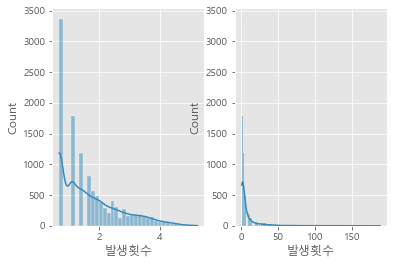

In [75]:
target_log = np.log1p(df_count['발생횟수'])
plt.subplot(1,2,1)
sns.histplot(target_log, kde=True)

plt.subplot(1,2,2)
sns.histplot(df_count['발생횟수'], kde=True)
plt.show();

#### 범주형 변수 인코딩

In [77]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encoding
encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(df_count[['사건종별', '적설', '강수량','행정동']])
df_one_hot = pd.DataFrame(encoded_columns.toarray(), columns=encoder.get_feature_names(['사건종별', '적설', '강수량','행정동']))
df_count = pd.concat([df_count.drop(['사건종별', '적설', '강수량','행정동'], axis=1), df_one_hot], axis=1)

# Label encoding
encoder = LabelEncoder()
#df_count['요일'] = encoder.fit_transform(df_count['요일'])
#df_count['주야간구분'] = encoder.fit_transform(df_count['주야간구분'])
#df_count['계절'] = encoder.fit_transform(df_count['계절'])

#### train, test 스플릿

In [79]:
from sklearn.model_selection import train_test_split

X = df_count.drop(['발생횟수','시군구'],axis=1)
y = target_log

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### 표준화 변환

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_features = scaler.fit_transform(X_train)
test_features = scaler.transform(X_test)

#### 평가지표 함수 생성

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# log 값 변환 시 NaN등의 이슈로 log() 가 아닌 log1p() 를 이용하여 RMSLE 계산
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

# 사이킷런의 mean_square_error() 를 이용하여 RMSE 계산
def rmse(y,pred):
    return np.sqrt(mean_squared_error(y,pred))

# MSE, RMSE, RMSLE 를 모두 계산 
def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = rmse(y,pred)
    # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    mae_val = mean_absolute_error(y,pred)
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

### 선형회귀결과

In [98]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 0.295, RMSE: 0.682, MAE: 0.553


In [83]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= pred
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=10)

      real_count  predicted_count      diff
2307    0.693147         3.554901  2.861754
599     0.693147         3.172893  2.479746
2159    0.693147         2.912147  2.219000
822     3.951244         1.764085  2.187159
1396    3.970292         1.847719  2.122573
1167    4.356709         2.331392  2.025317
863     3.367296         1.365681  2.001615
177     3.850148         1.855317  1.994830
1189    0.693147         2.585484  1.892337
321     0.693147         2.577061  1.883914


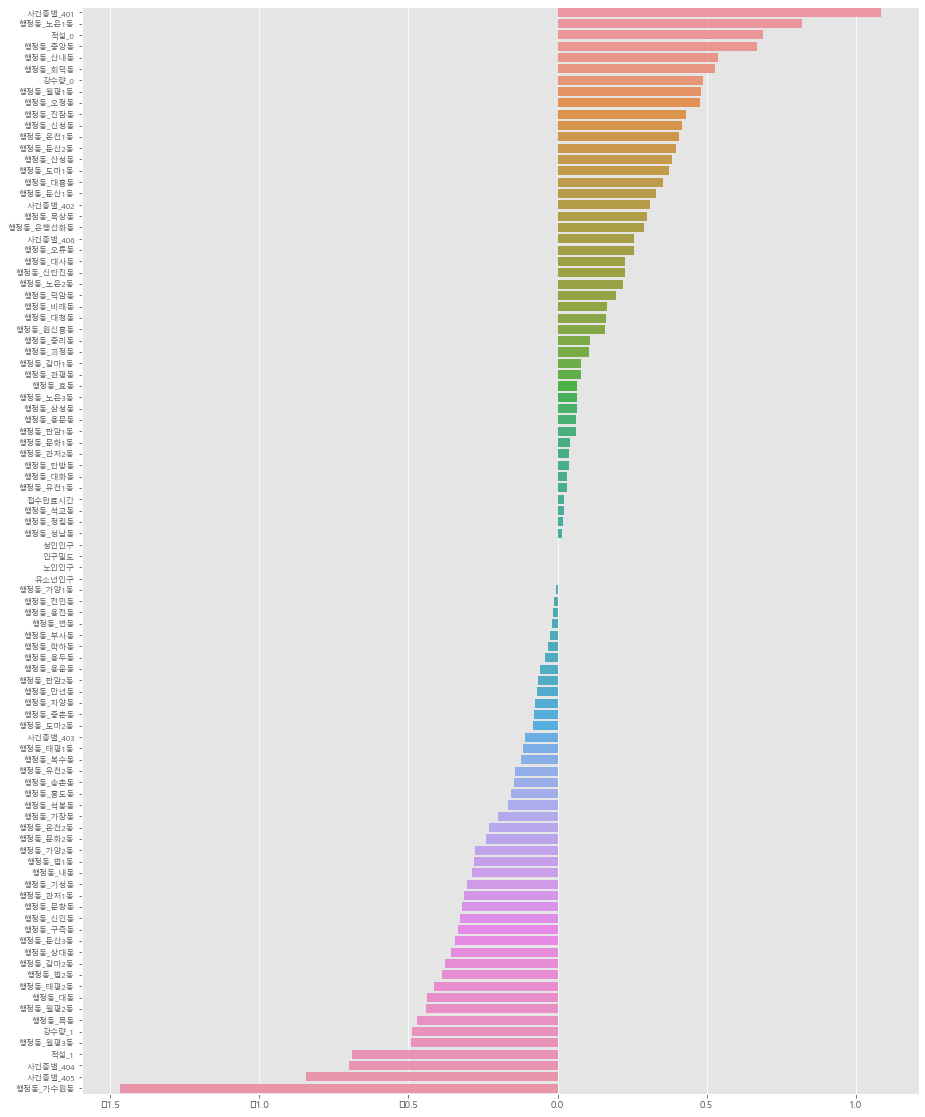

In [92]:
plt.figure(figsize=(15,20))
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)
plt.yticks(fontsize=8)
plt.savefig('log_transform.tif', format='tif', dpi=300, bbox_inches='tight')

### 선형, 라쏘, 릿지

In [94]:
# 모델과 학습/테스트 데이터 셋을 입력하면 성능 평가 수치를 반환
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1 :
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###',model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [95]:
# model 별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model,X_train, X_test, y_train, y_test,is_expm1=True)

### LinearRegression ###
RMSLE: 0.682, RMSE: 12.309, MAE: 5.545
### Ridge ###
RMSLE: 0.683, RMSE: 12.427, MAE: 5.568
### Lasso ###
RMSLE: 0.737, RMSE: 13.665, MAE: 5.978


### 회귀트리

In [96]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

### RandomForestRegressor ###
RMSLE: 0.491, RMSE: 7.818, MAE: 3.114
### GradientBoostingRegressor ###
RMSLE: 0.489, RMSE: 8.355, MAE: 3.650
### XGBRegressor ###
RMSLE: 0.509, RMSE: 8.393, MAE: 3.274
### LGBMRegressor ###
RMSLE: 0.443, RMSE: 7.304, MAE: 2.888


#### 파라미터 튜닝

In [100]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X, y)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.7551, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.7247, 최적 alpha:{'alpha': 0.001}


In [103]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=20)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.682
Ridge 로그 변환된 RMSE: 0.684
Lasso 로그 변환된 RMSE: 0.687


[0.6824024919587336, 0.6838619981158032, 0.6869086182525671]

In [113]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= pred
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])

print('선형:',get_top_error_data(y_test,lr_reg.predict(X_test),n_tops=5))
print('라쏘:',get_top_error_data(y_test,lasso_reg.predict(X_test),n_tops=5))
print('릿지:',get_top_error_data(y_test,ridge_reg.predict(X_test),n_tops=5))

      real_count  predicted_count      diff
2307    0.693147         3.554901  2.861754
599     0.693147         3.172893  2.479746
2159    0.693147         2.912147  2.219000
822     3.951244         1.764085  2.187159
1396    3.970292         1.847719  2.122573
선형: None
      real_count  predicted_count      diff
2307    0.693147         3.470694  2.777547
599     0.693147         3.123208  2.430061
822     3.951244         1.678852  2.272392
2159    0.693147         2.837265  2.144118
1167    4.356709         2.270127  2.086582
라쏘: None
      real_count  predicted_count      diff
2307    0.693147         3.487931  2.794784
599     0.693147         3.043203  2.350056
822     3.951244         1.744635  2.206609
2159    0.693147         2.868193  2.175046
1396    3.970292         1.855139  2.115153
릿지: None


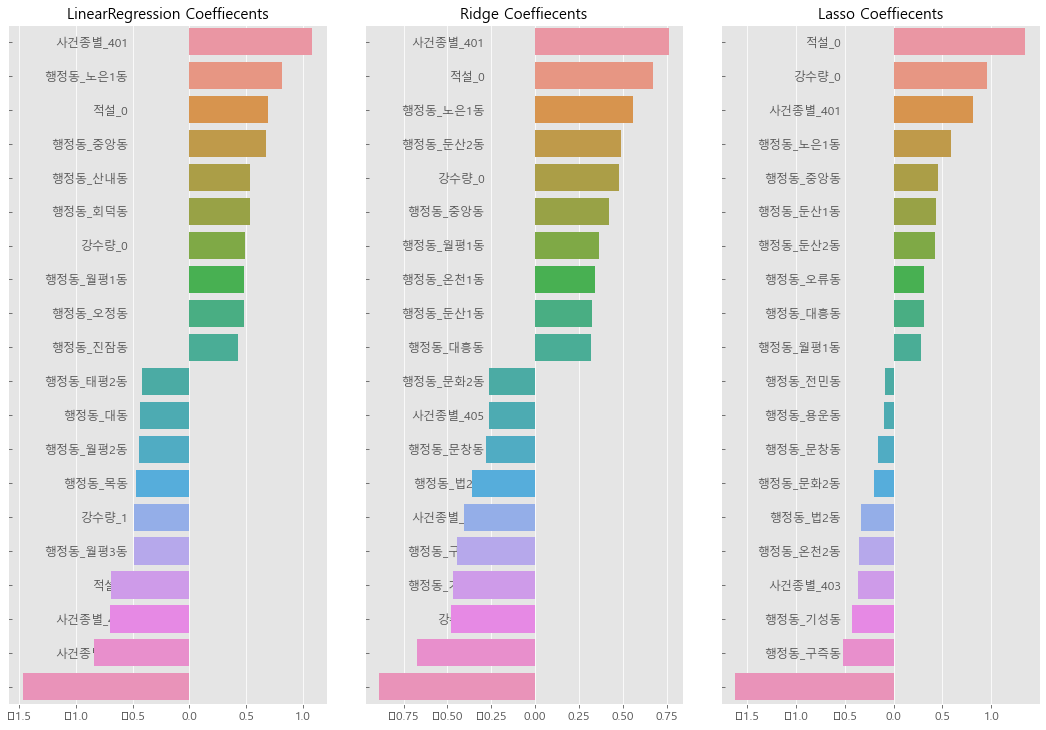

In [107]:
# 모든 모델의 회귀 계수 시각화 
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(15,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=15)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(12)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)